### Logistic Regression
- Logistic Regression is a suppervised machine learning algorithm used for classification problems. It is used for binary classification where the output can be one of two possible categories such as Yes/No, True/False or 0/1. It uses `Sigmoid` function to convert inputs into a probability value between 0 and 1. 
### Sigmoid Function
- The sigmoid function is a important part of logistic regression which is used to convert the raw output of the model into a probability value between 0 and 1.
- In logistic regression, we use a threshold value ussually 0.5 to decide the class label.
  - If the sigmoid output is same or above the threshold, the input is classified as `Class 1`.
  - If it is below the threshold, the input is classified as `Class 0`
- Formula: 
  $$
  \hat{y} = \sigma{(z)} = \frac{1}{1 + e^{-z}}
  $$
  - where:
  $$
  z = X \cdot W + b
  $$
### Loss Function (Cross-Entropy)
- Squared error cost:
$$
J(W, b) = \frac{1}{N} \sum_{i=1}^{N}(\hat{y}^{(i)} - y^{(i)})^2 = L(\hat{y}^{(i)}, y^{(i)})
$$
- Logistic loss function:
  $$
  L(\hat{y}^{(i)},\, y^{(i)}) =
  \begin{cases}
  - \log\big(\hat{y}^{(i)}\big) & \text{if } y^{(i)} = 1,\\[4pt]
  - \log\big(1 - \hat{y}^{(i)}\big) & \text{if } y^{(i)} = 0.
  \end{cases}
  $$
    - or
  $$
  L(\hat{y}^{(i)}, y^{(i)}) = -[y^{(i)}log(\hat{y}^{(i)}) + (1 - y^{(i)})log(1 - \hat{y}^{(i)})]
  $$
- Simplified cost function:
  $$
  J(W, b) = -\frac{1}{N} \sum_{i=1}^{N} [y^{(i)}log(\hat{y}^{(i)}) + (1 - y^{(i)})log(1 - \hat{y}^{(i)})]
  $$
### Gradient Descent
- We want: 
$$
\frac{\partial L}{\partial w}
$$
- Apply the Chain rule:
    1. Derivative of Loss with respect to $\hat{y}$:
    $$
    \frac{\partial L}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}
    $$
    2. Derivative of $\hat{y}$ with respect to z (sigmoid derivative):
    $$
    \frac{\partial \hat{y}}{\partial z} = \hat{y} (1 - \hat{y})
    $$
    3. Derivative of z with respect to w:
    $$
    \frac{\partial z}{\partial w} = x
    $$
- Combine (Chain rule):
$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w} = (\hat{y} - y)x
$$
- Thus:
$$
\frac{\partial J}{\partial w} = \frac{1}{N} \sum_{i=1}^{N}(\hat{y}^{(i)} - y^{(i)})x^{(i)}
$$
$$
\frac{\partial J}{\partial b} = \frac{1}{N} \sum_{i=1}^{N}(\hat{y}^{(i)} - y^{(i)})
$$
- Update weight and bias:
$$
w := w - \alpha \cdot \frac{\partial J}{\partial w}
$$
$$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$
### Exam pass prediction

#### Logistic Regression Model use library

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [12]:
data = pd.read_csv("data_classification.csv", header=None)
print(data.head())

          0         1  2
0  4.855064  9.639962  1
1  8.625440  0.058927  0
2  3.828192  0.723199  0
3  7.150955  3.899420  1
4  6.477900  8.198181  1


In [13]:
X = data.iloc[:, 0:2]
y = data.iloc[:, -1]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


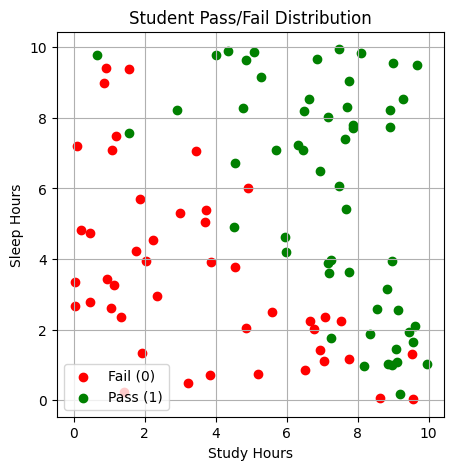

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(X.loc[y == 0, X.columns[0]], X.loc[y == 0, X.columns[1]], color="red", label="Fail (0)")
ax.scatter(X.loc[y == 1, X.columns[0]], X.loc[y == 1, X.columns[1]], color="green", label="Pass (1)")

ax.set_xlabel("Study Hours")
ax.set_ylabel("Sleep Hours")
ax.set_title("Student Pass/Fail Distribution")
ax.legend()
ax.grid(True)

plt.show()

In [15]:
model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=100000)
model.fit(X, y)

LogisticRegression(max_iter=100000, penalty=None)

In [16]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]
print(w1, w2)
print(b)

1.7457390054399755 1.4868044781354357
-16.163670115200652


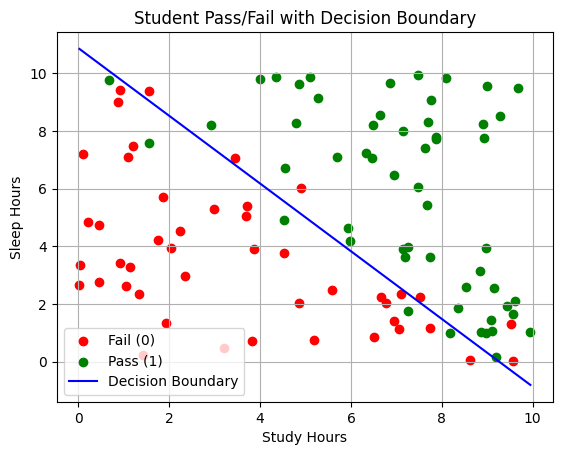

In [17]:
x_vals = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), X.shape[0])
y_vals = -(w1 / w2) * x_vals - (b / w2)


plt.scatter(X.loc[y == 0, X.columns[0]], X.loc[y == 0, X.columns[1]], color="red", label="Fail (0)")
plt.scatter(X.loc[y == 1, X.columns[0]], X.loc[y == 1, X.columns[1]], color="green", label="Pass (1)")

plt.plot(x_vals, y_vals, color="blue", label="Decision Boundary")

plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Student Pass/Fail with Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

#### Logistic Regression use Gradient Descent

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [19]:
def cost_function(X, y, W, b):
    N = X.shape[0]

    z = X @ W + b
    y_pred = sigmoid(z)

    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    cost = - (1 / N) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    return cost

In [20]:
def update(X, y, W, b, learning_rate):
    N = X.shape[0]
    
    z = X @ W + b
    y_pred = sigmoid(z)
    errors = y_pred - y
    
    W_grad = (1 / N) * (X.T @ errors)
    b_grad = (1 / N) * np.sum(errors)
    
    W -= learning_rate * W_grad
    b -= learning_rate * b_grad
    
    return W, b

In [21]:
def train(X, y, W, b, learning_rate=0.01, epochs=100):
    costs = []

    for _ in range(epochs):
        W, b = update(X, y, W, b, learning_rate)
        costs.append(cost_function(X, y, W, b))

    return W, b, costs

In [22]:
W = np.zeros(X.shape[1], dtype=float)
b = 0.0
learning_rate = 0.1
epochs = 100000

W, b, costs = train(X, y, W, b, learning_rate, epochs)

In [23]:
w1, w2 = W
print(w1, w2)
print(b)

1.7438155500177877 1.485096109307391
-16.14526547782331


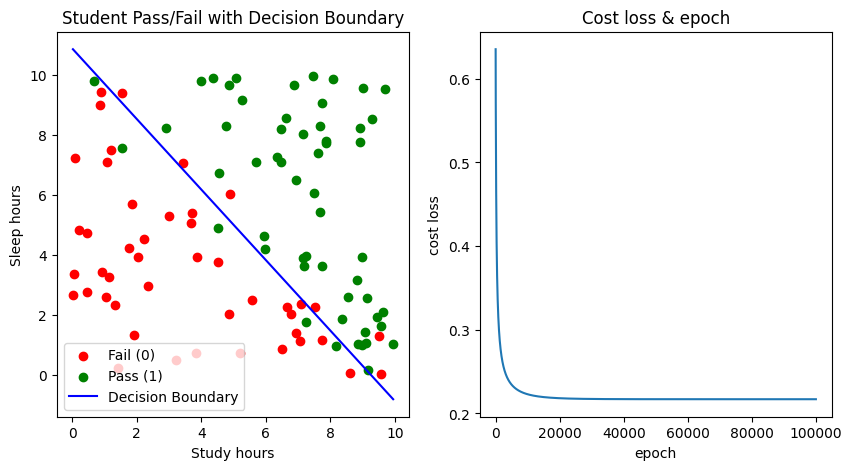

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].scatter(X.loc[y == 0, X.columns[0]], X.loc[y == 0, X.columns[1]], color="red", label="Fail (0)")
ax[0].scatter(X.loc[y == 1, X.columns[0]], X.loc[y == 1, X.columns[1]], color="green", label="Pass (1)")
ax[0].set_xlabel("Study hours")
ax[0].set_ylabel("Sleep hours")
ax[0].set_title("Student Pass/Fail with Decision Boundary")

x_vals = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), X.shape[0])
y_vals = -(w1 / w2) * x_vals - b / w2

ax[0].plot(x_vals, y_vals, color="blue", label="Decision Boundary")
ax[0].legend()

ax[1].plot(costs)
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("cost loss")
ax[1].set_title("Cost loss & epoch")

plt.show()